In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os

os.makedirs("figs", exist_ok=True)

plt.rcParams.update({
    "figure.figsize": (8, 6),
    "figure.dpi": 200,
    "axes.labelsize": 14,
    "axes.titlesize": 16,
    "xtick.labelsize": 12,
    "ytick.labelsize": 12,
    "lines.linewidth": 2,
})

data shape: (24478, 2)
number of particles: 24478
rho sum: -24478.0
rho min/max: -24.218592335801986 0.0
rho mean, std: -2.4478 4.687308202901562
0 51.526619 53.322742 -> i,j 51 52 dx,dy 0.026618999999996618 0.8227419999999981
1 50.394722 46.322815 -> i,j 49 45 dx,dy 0.8947220000000016 0.8228149999999985
2 48.705956 45.986626 -> i,j 48 45 dx,dy 0.20595600000000047 0.4866260000000011
3 87.786476 40.758865 -> i,j 87 40 dx,dy 0.2864759999999933 0.2588650000000001
4 46.489464 11.477116 -> i,j 45 10 dx,dy 0.9894639999999981 0.9771160000000005
5 54.453606 49.560772 -> i,j 53 49 dx,dy 0.9536060000000006 0.06077200000000005
6 17.067875 30.248518 -> i,j 16 29 dx,dy 0.5678750000000008 0.7485180000000007
7 73.492897 19.880688 -> i,j 72 19 dx,dy 0.9928969999999993 0.38068799999999925
8 36.273556 85.556152 -> i,j 35 85 dx,dy 0.7735559999999992 0.056151999999997315
9 46.690193 53.74865 -> i,j 46 53 dx,dy 0.19019300000000072 0.24864999999999782


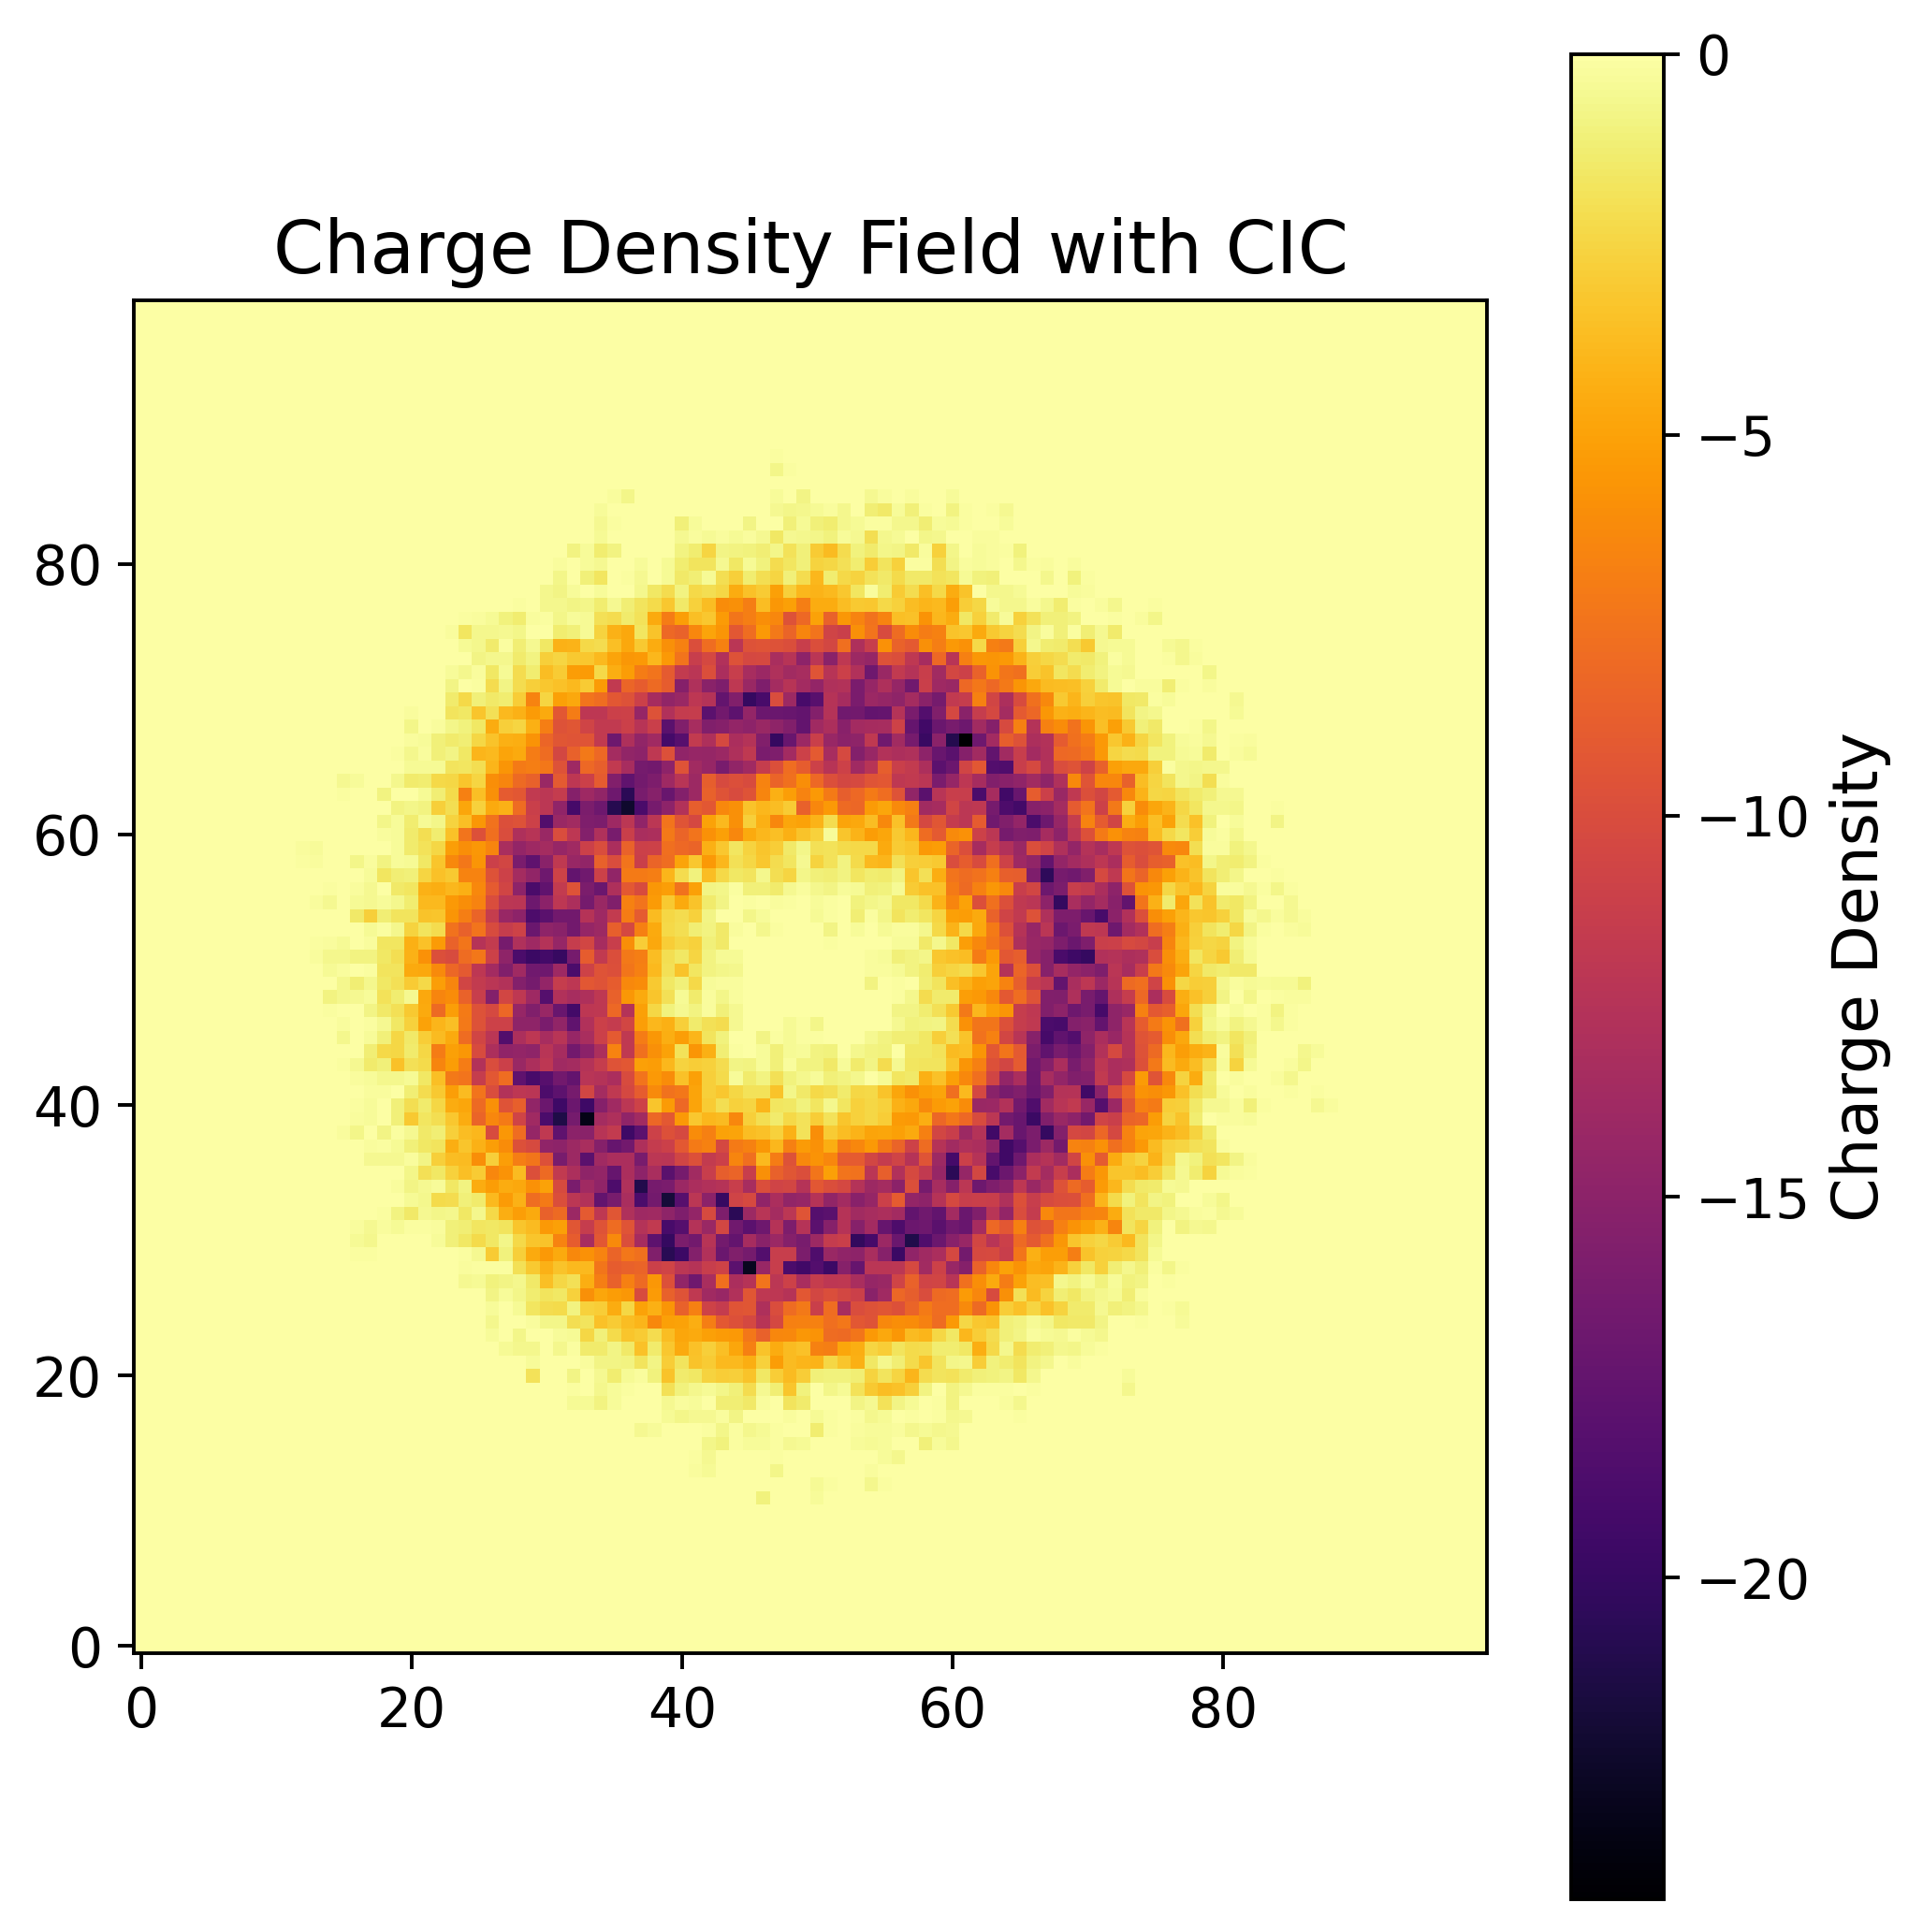

In [99]:
# Problem 2
data = np.genfromtxt("particles.dat")
x = data[:,0]
y = data[:,1]
M = 100
rho = np.zeros([M,M],dtype=float)
e = -1.0 # only density matters
epsilon = 1.0

# cloud in cell
for px,py in zip(x,y):
    i = int(np.floor(px-0.5))
    j = int(np.floor(py-0.5))

    # clip boundaries
    if i < 0 or i>= M-1:
        continue
    if j < 0 or j>= M-1:
        continue

    dx = px - (i+0.5)
    dy = py - (j+0.5)
    
    #weights
    w00 = (1-dx)*(1-dy)
    w10 = dx *   (1-dy)
    w01 = (1-dx)*dy
    w11 = dx*    dy
    
    rho[i  ,j  ] += e*w00
    rho[i+1,j  ] += e*w10
    rho[i,  j+1] += e*w01
    rho[i+1,j+1] += e*w11

# draw density plot
plt.figure(figsize=(6,6),dpi=350)
plt.imshow(rho.T, origin='lower',cmap='inferno')
plt.colorbar(label="Charge Density")
plt.title("Charge Density Field with CIC")
plt.tight_layout()
plt.savefig("figs/chargedensity.png",dpi=350, bbox_inches="tight")

print("data shape:", data.shape)
print("number of particles:", len(x))
print("rho sum:", rho.sum())
print("rho min/max:", rho.min(), rho.max())
print("rho mean, std:", rho.mean(), rho.std())
# ensure dx/dy are within [0,1] for a few particles
for k,(px,py) in enumerate(zip(x[:10], y[:10])):
    i = int(np.floor(px-0.5)); j = int(np.floor(py-0.5))
    dx = px - (i+0.5); dy = py - (j+0.5)
    print(k, px, py, "-> i,j", i,j, "dx,dy", dx,dy)


1000 1.2366936959272152
2000 0.716573198983042
3000 0.4303253985945048
4000 0.2598485814378364
5000 0.1570241414819975
6000 0.09489770743493864
7000 0.05735229979563883
8000 0.03466145265929299
9000 0.020948011501786823
10000 0.012660150543979398
11000 0.007651294922652596
12000 0.004624140455234738
13000 0.0027946478621743154
14000 0.0016889747953428014
15000 0.0010207496611656097
16000 0.0006169007829157636
17000 0.0003728304700416629
18000 0.00022532401044372818
19000 0.00013617693321066326
20000 8.229996046793531e-05
21000 4.973884551873198e-05
22000 3.0060194148973096e-05
23000 1.8167194411944365e-05
24000 1.0979534181387862e-05
25000 6.635597856075037e-06
26000 4.010293196188286e-06
27000 2.423662408546079e-06
28000 1.4647662283095997e-06
29000 8.852466635289602e-07
30000 5.350070750864688e-07
31000 3.233376446587499e-07
32000 1.954126673808787e-07
33000 1.180987965199165e-07
34000 7.137577995308675e-08
35000 4.31368789577391e-08
36000 2.60702108789701e-08
37000 1.575517671881243

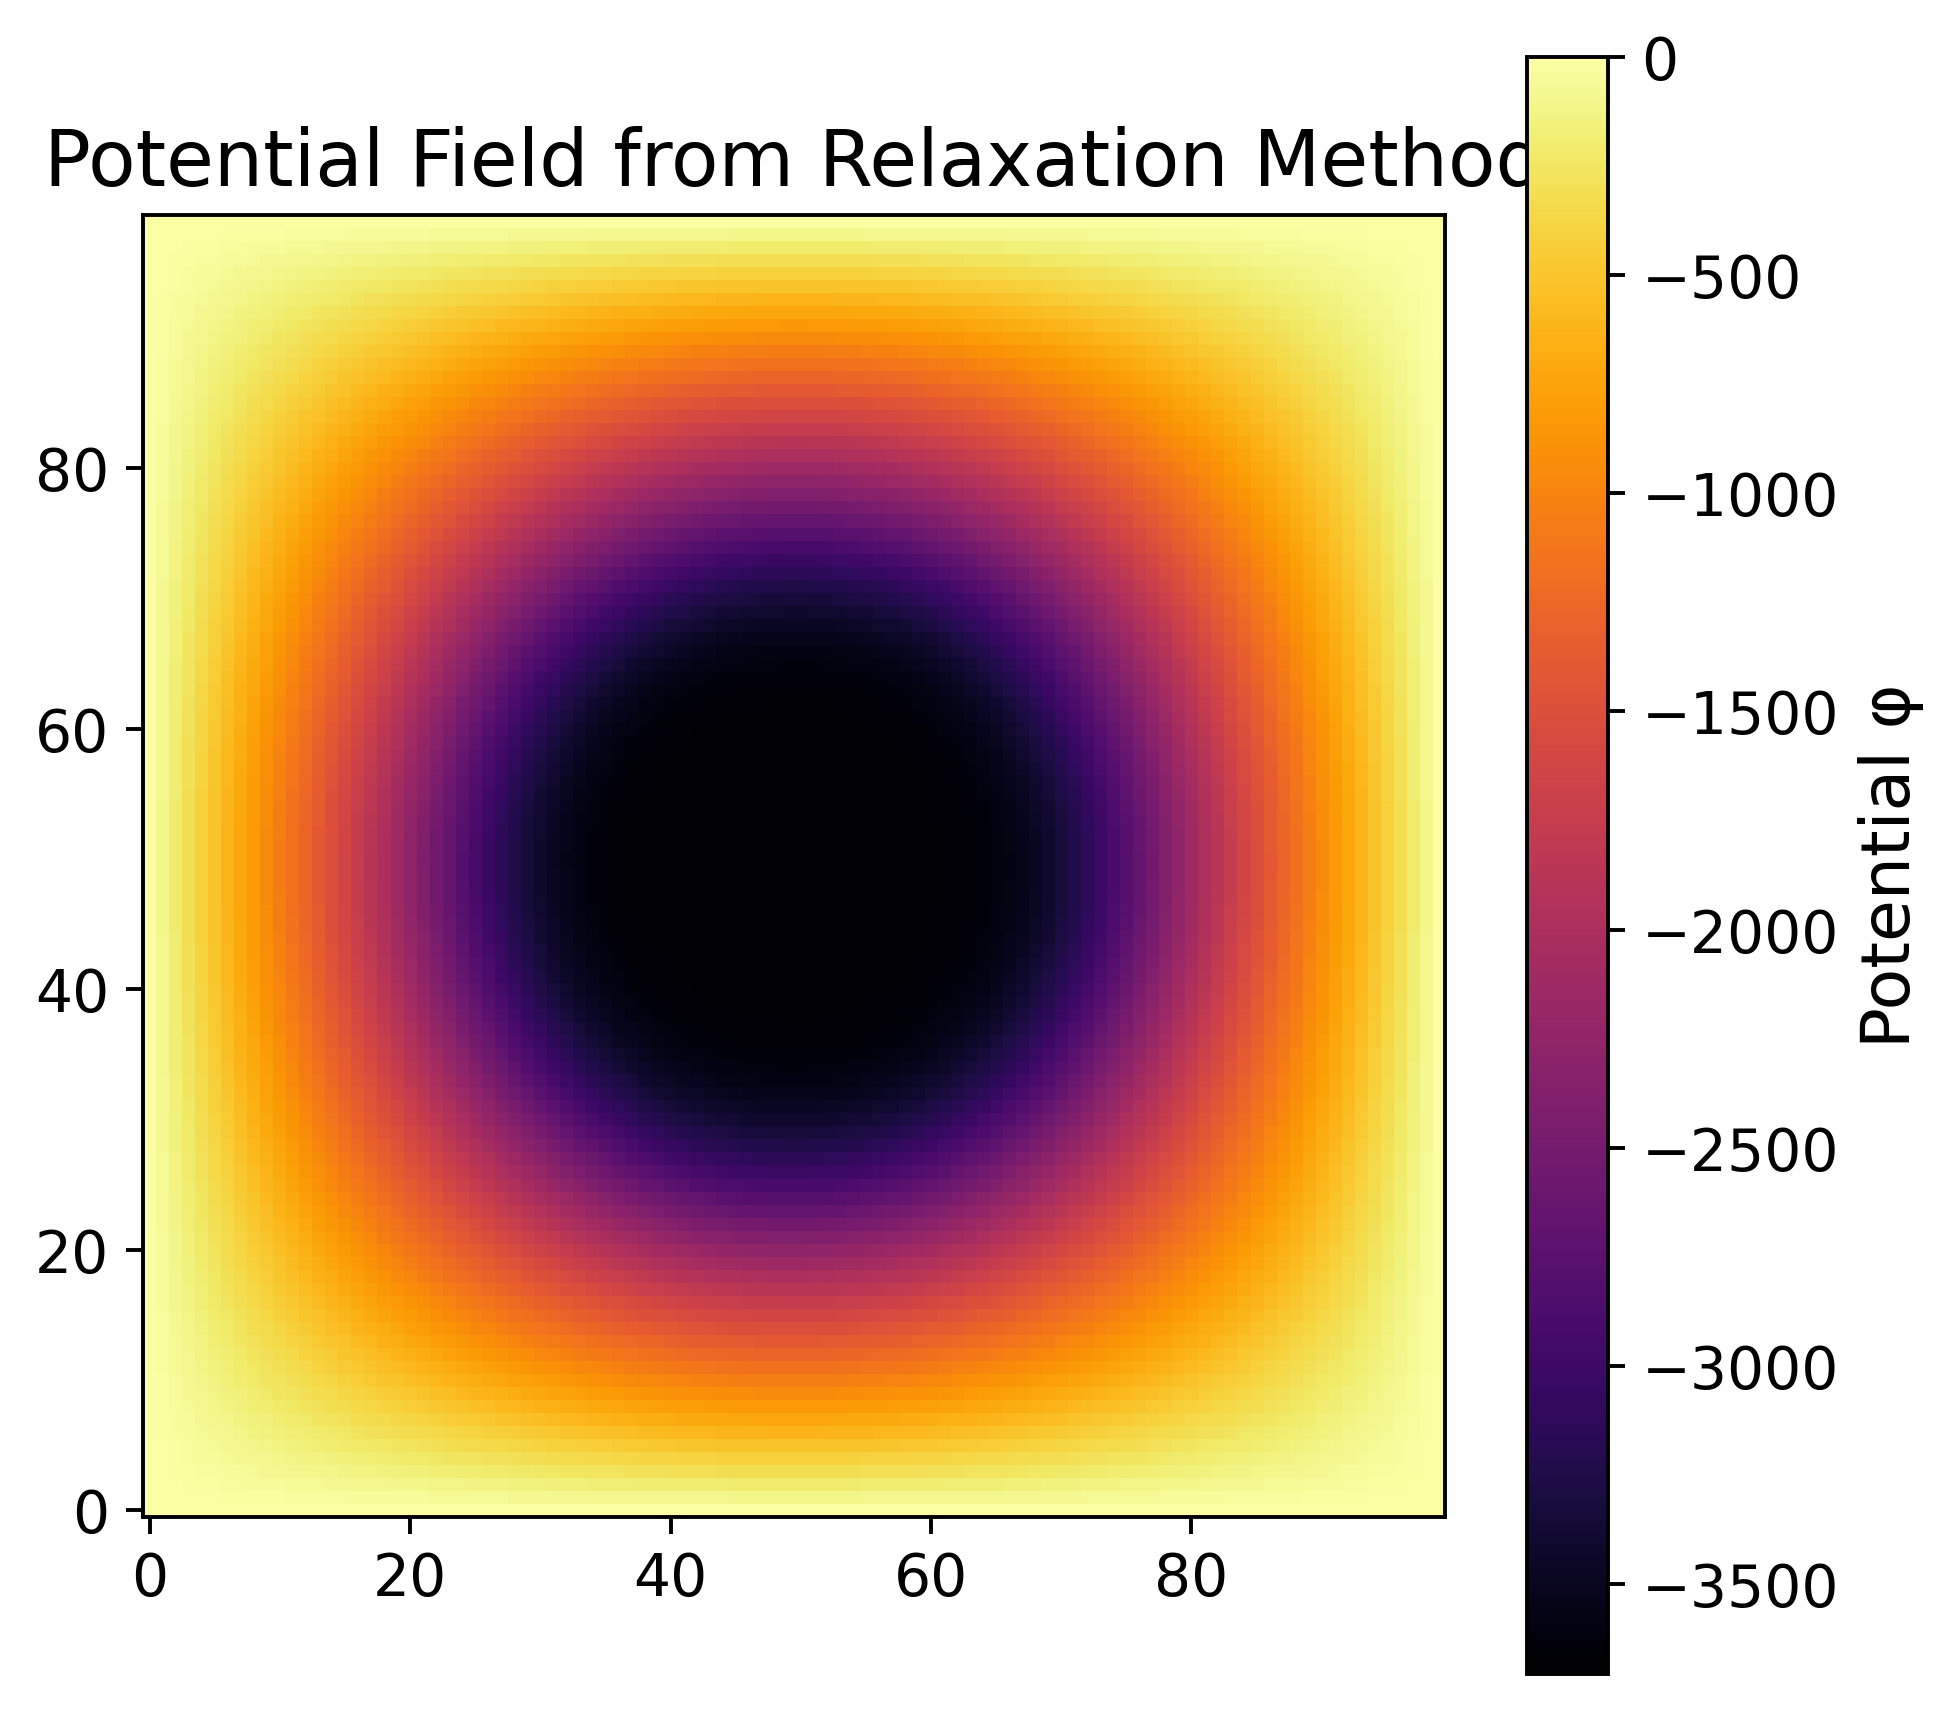

In [67]:
a = 1       # grid spacing
target = 9e-11 # Newman’s tolerance

phi = np.zeros((M, M))
phiprime = np.zeros((M, M))

iters = 0
max_iter = 1000000

while delta > target and iters < max_iter:
    for i in range(1, M-1):
        for j in range(1, M-1):
            # Standard 5-point stencil Poisson solve
            phiprime[i,j] = 0.25 * (
                phi[i+1,j] + phi[i-1,j] +
                phi[i,j+1] + phi[i,j-1] +
                a*a * rho[i,j]/epsilon
            )

    # boundaries stay at zero automatically (grounded box)
    delta = np.max(np.abs(phi - phiprime))
    phi, phiprime = phiprime, phi
    iters += 1
    if iters % 1000 == 0:
        print(iters, delta)

print("Converged in iterations:", iters)

# Plot potential
plt.figure(figsize=(6,6),dpi=350)
plt.imshow(phi.T, origin='lower', cmap='inferno')
plt.colorbar(label="Potential φ")
plt.title("Potential Field from Relaxation Method")
plt.show()

/var/folders/1f/v2ws8crn4c34nx9fvpdjdb2c0000gn/T/ipykernel_51195/3680821679.py:15: RuntimeWarning: overflow encountered in scalar add
  S = (phi[i+1,j] + phi[i-1,j] +
/var/folders/1f/v2ws8crn4c34nx9fvpdjdb2c0000gn/T/ipykernel_51195/3680821679.py:15: RuntimeWarning: invalid value encountered in scalar add
  S = (phi[i+1,j] + phi[i-1,j] +
/var/folders/1f/v2ws8crn4c34nx9fvpdjdb2c0000gn/T/ipykernel_51195/3680821679.py:21: RuntimeWarning: overflow encountered in subtract
  delta = np.max(np.abs(phinew - phi))


Optimal Newman-style w = 0.9996334312820713
Best cached w = 0.999267 → iterations: 656


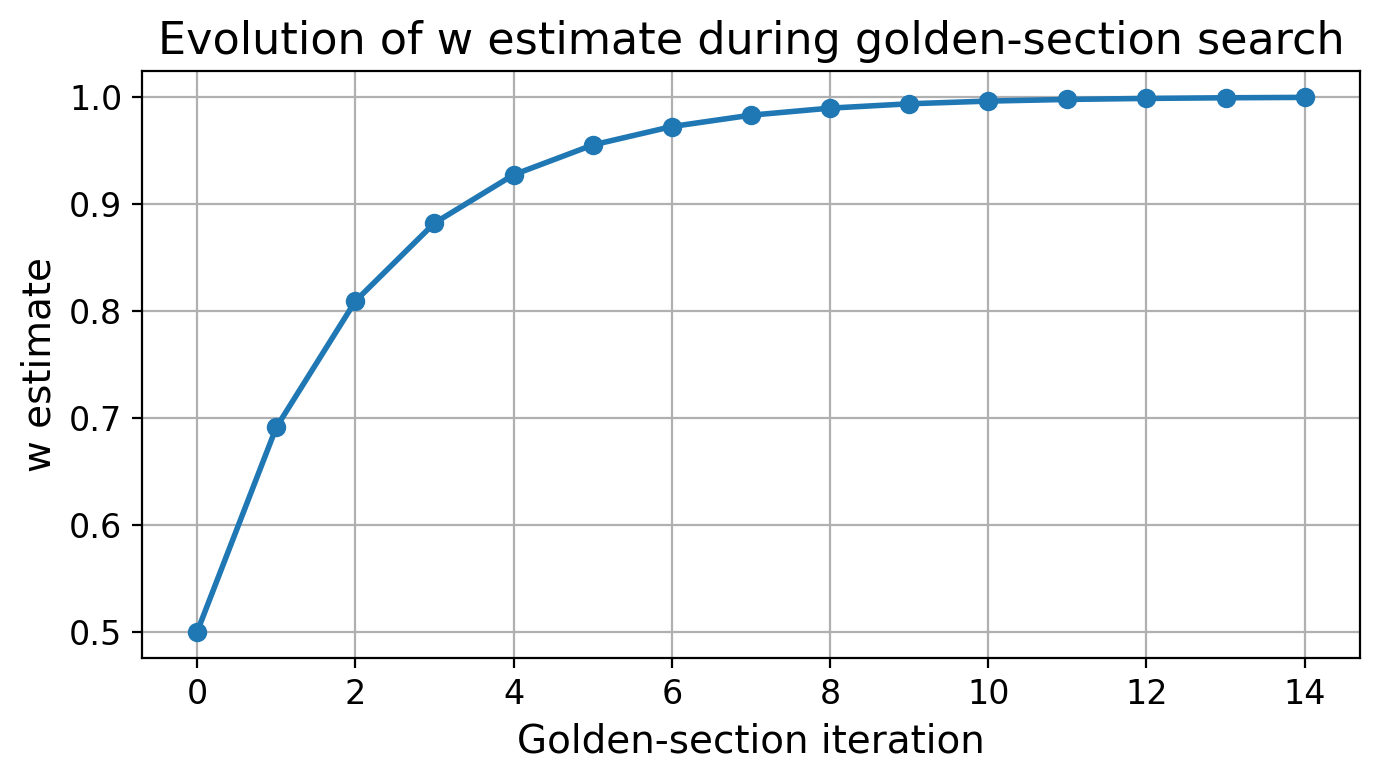

In [101]:
def sor_iterations_for_w(w, rho, a=1.0, epsilon=1.0,
                         target=1e-10, max_iter=200000,
                         print_progress=False):
    M = rho.shape[0]
    phi     = np.zeros((M, M))
    phinew  = np.zeros((M, M))
    
    iters = 0
    delta = 1.0

    while delta > target and iters < max_iter:
        for i in range(1, M-1):
            for j in range(1, M-1):

                S = (phi[i+1,j] + phi[i-1,j] +
                     phi[i,j+1] + phi[i,j-1] +
                     a*a * rho[i,j] / epsilon)

                phinew[i,j] = ((1+w)/4)*S - w*phi[i,j]

        delta = np.max(np.abs(phinew - phi))
        phi, phinew = phinew, phi
        iters += 1

        if print_progress and iters % 1000 == 0:
            print(iters, delta)

    return iters, delta

# Golden ratio constant
gr = (np.sqrt(5) - 1) / 2  # ≈ 0.618

# Search interval for Newman's w
a0 = 0.0
b0 = 1.0
tol = 1e-3   # required precision in wtei

# Initial interior points
c = b0 - gr*(b0 - a0)
d = a0 + gr*(b0 - a0)

# Cache evaluations to avoid re-running solves
cache = {}
def f_eval(w):
    w_rounded = float(round(w, 6))
    if w_rounded not in cache:
        iters, _ = sor_iterations_for_w(w_rounded, rho,
                                        target=1e-6,   # faster for searching
                                        max_iter=50000)
        cache[w_rounded] = iters
    return cache[w_rounded]

f_c = f_eval(c)
f_d = f_eval(d)

# Track midpoint evolution for plotting
history = []

while (b0 - a0) > tol:
    w_mid = 0.5*(a0 + b0)
    history.append(w_mid)

    if f_c < f_d:
        b0 = d
        d = c
        f_d = f_c
        c = b0 - gr*(b0 - a0)
        f_c = f_eval(c)
    else:
        a0 = c
        c = d
        f_c = f_d
        d = a0 + gr*(b0 - a0)
        f_d = f_eval(d)

w_opt = 0.5*(a0 + b0)
print("Optimal Newman-style w =", w_opt)

# Show best cached w
best_w = min(cache.keys(), key=lambda k: cache[k])
print("Best cached w =", best_w, "→ iterations:", cache[best_w])


plt.figure(figsize=(7,4))
plt.plot(history, marker='o')
plt.xlabel("Golden-section iteration")
plt.ylabel("w estimate")
plt.title("Evolution of w estimate during golden-section search")
plt.grid(True)
plt.tight_layout()
plt.savefig("figs/wevolution.png", dpi=350, bbox_inches='tight')
plt.show()

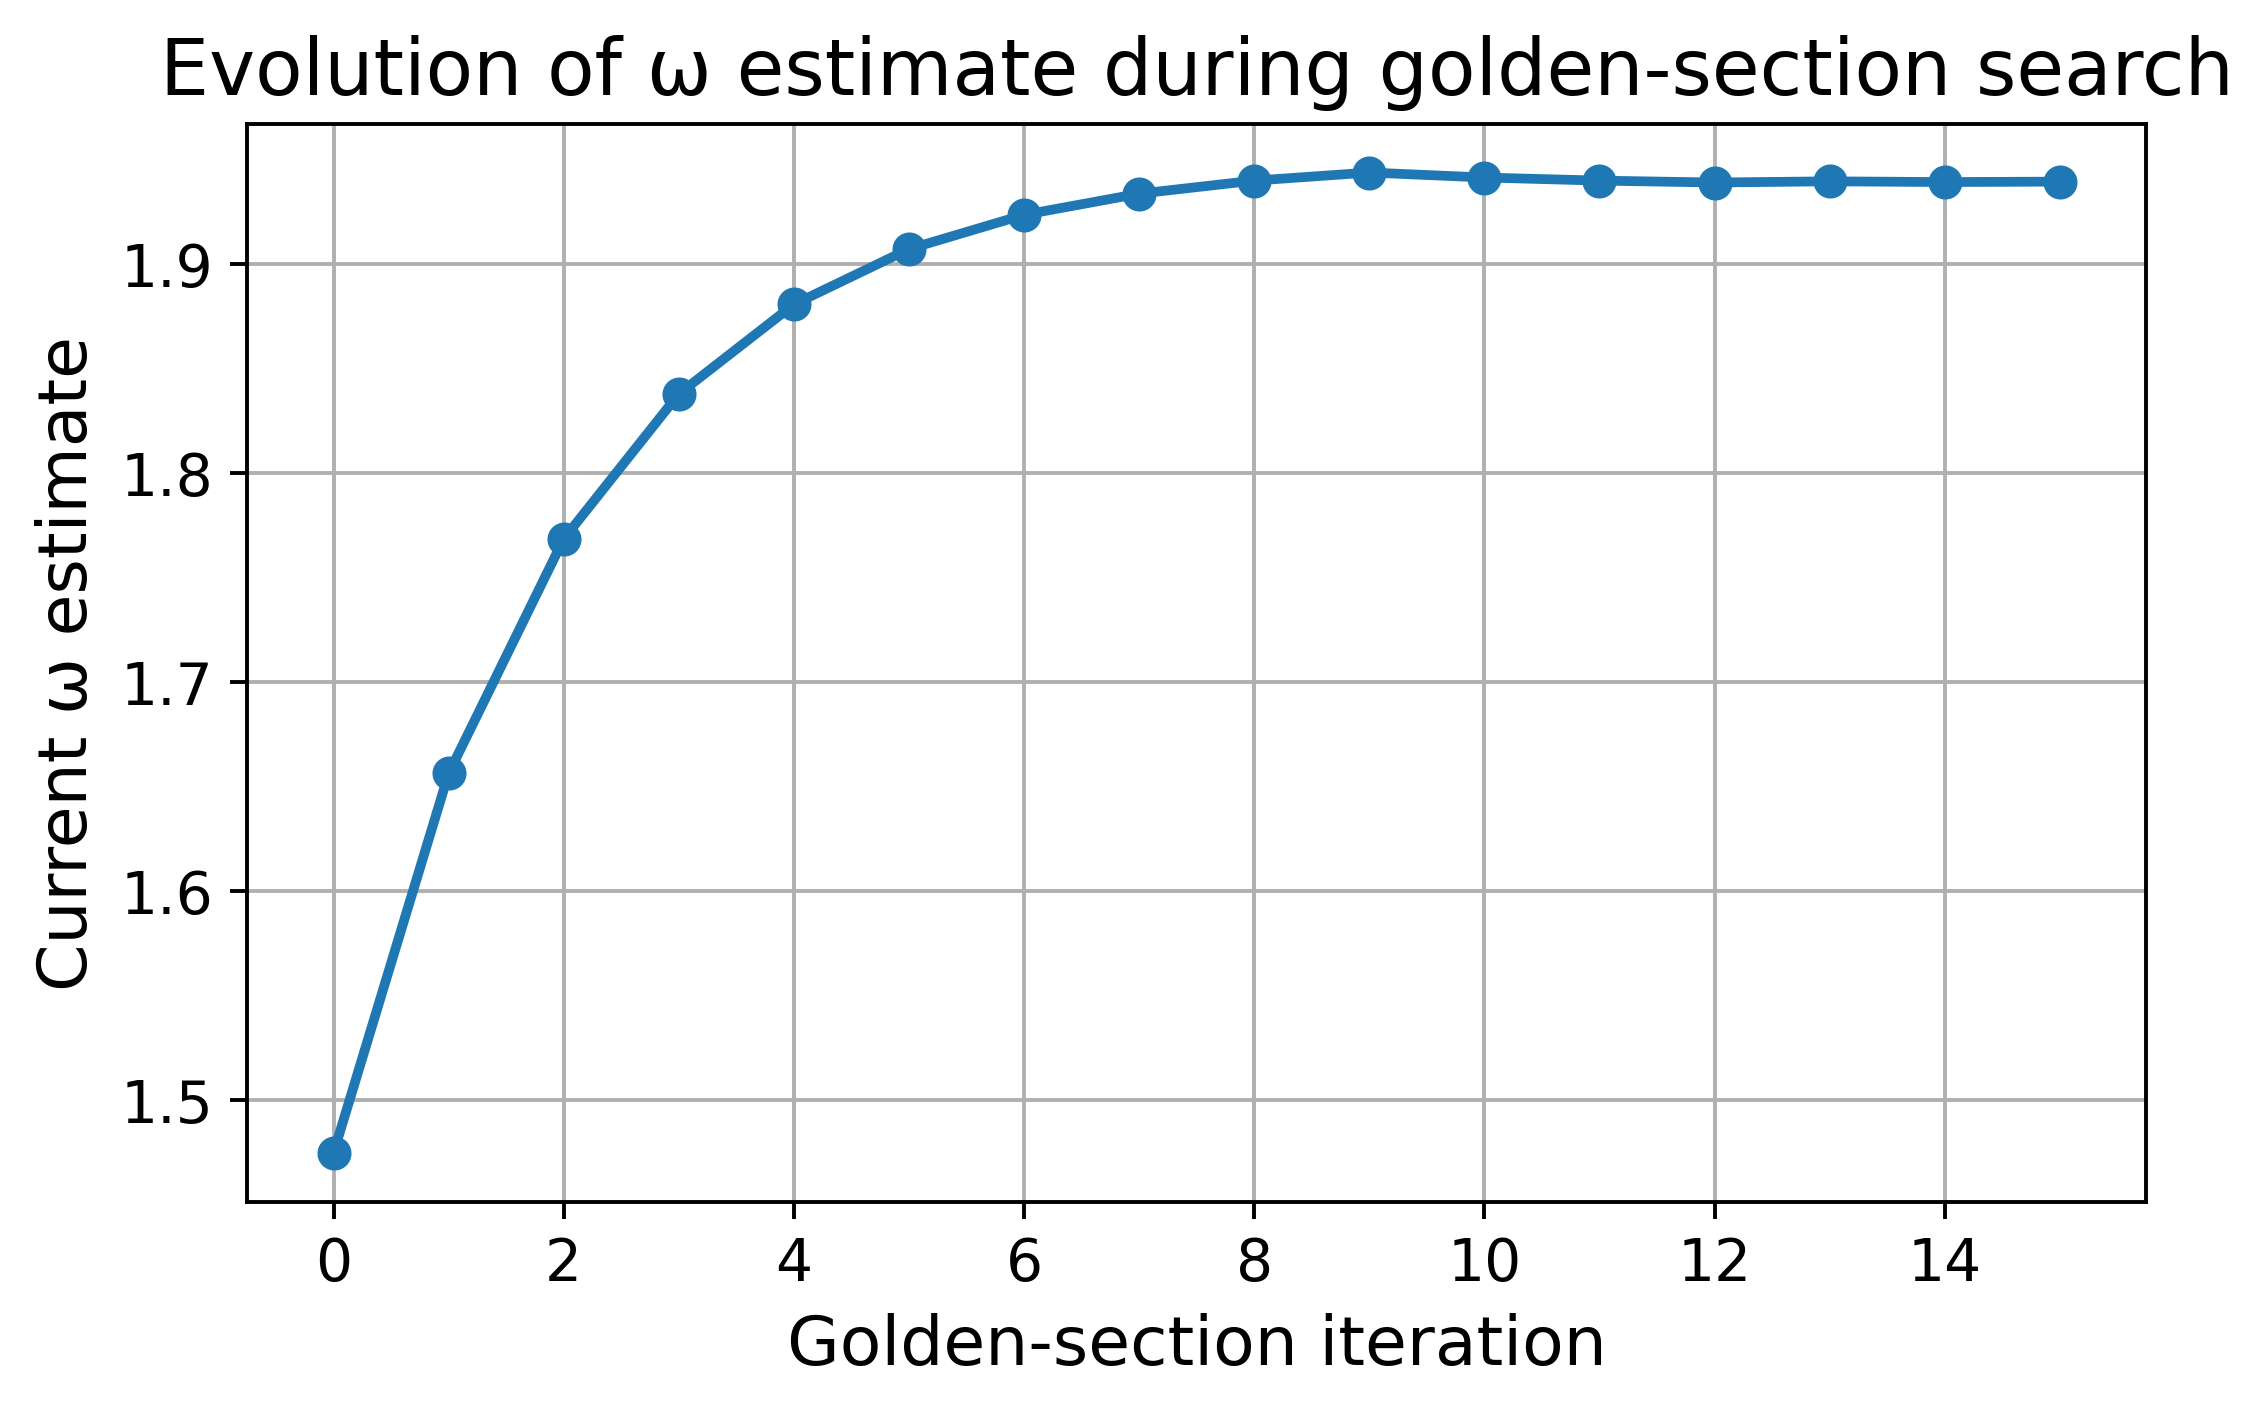

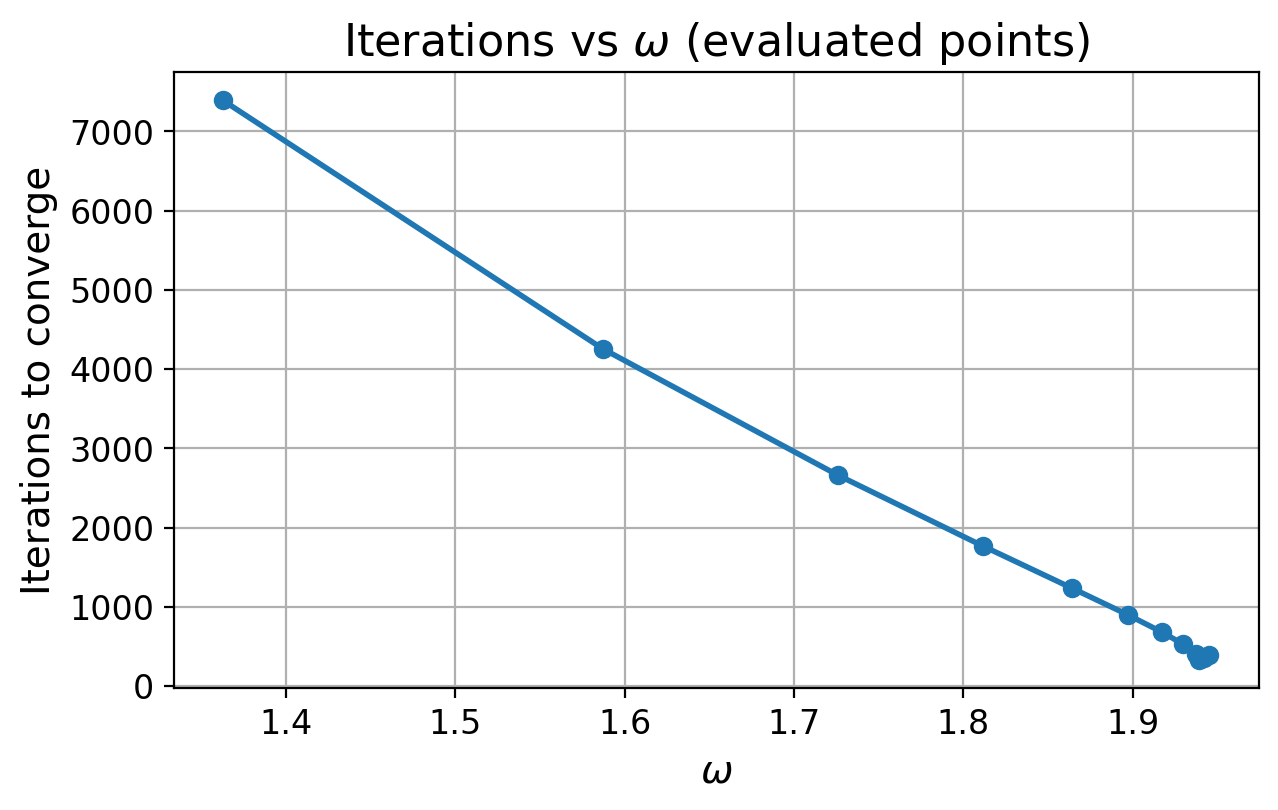

In [72]:
plt.figure(figsize=(7,4),dpi=350)
plt.plot(omega_midpoints, marker='o')
plt.xlabel("Golden-section iteration")
plt.ylabel("Current ω estimate")
plt.title("Evolution of ω estimate during golden-section search")
plt.grid(True)
plt.savefig("figs/wevolution.png")

# optional: plot iterations vs evaluated omega points
evaluated_omegas = sorted(cache.keys())
iters_vals = [cache[o] for o in evaluated_omegas]
plt.figure(figsize=(7,4))
plt.plot(evaluated_omegas, iters_vals, marker='o', linestyle='-')
plt.xlabel(r"$\omega$")
plt.ylabel("Iterations to converge")
plt.title(r"Iterations vs $\omega$ (evaluated points)")
plt.grid(True)
plt.savefig("figs/iterations.png")


step     0, |phi|^2 max =  9.999e-01
step    20, |phi|^2 max =  9.795e-01
step    40, |phi|^2 max =  9.278e-01
step    60, |phi|^2 max =  8.581e-01
step    80, |phi|^2 max =  7.826e-01
step   100, |phi|^2 max =  7.096e-01
step   120, |phi|^2 max =  6.431e-01
step   140, |phi|^2 max =  5.843e-01
step   160, |phi|^2 max =  5.333e-01
step   180, |phi|^2 max =  4.891e-01
step   200, |phi|^2 max =  4.507e-01
step   220, |phi|^2 max =  4.172e-01
step   240, |phi|^2 max =  3.879e-01


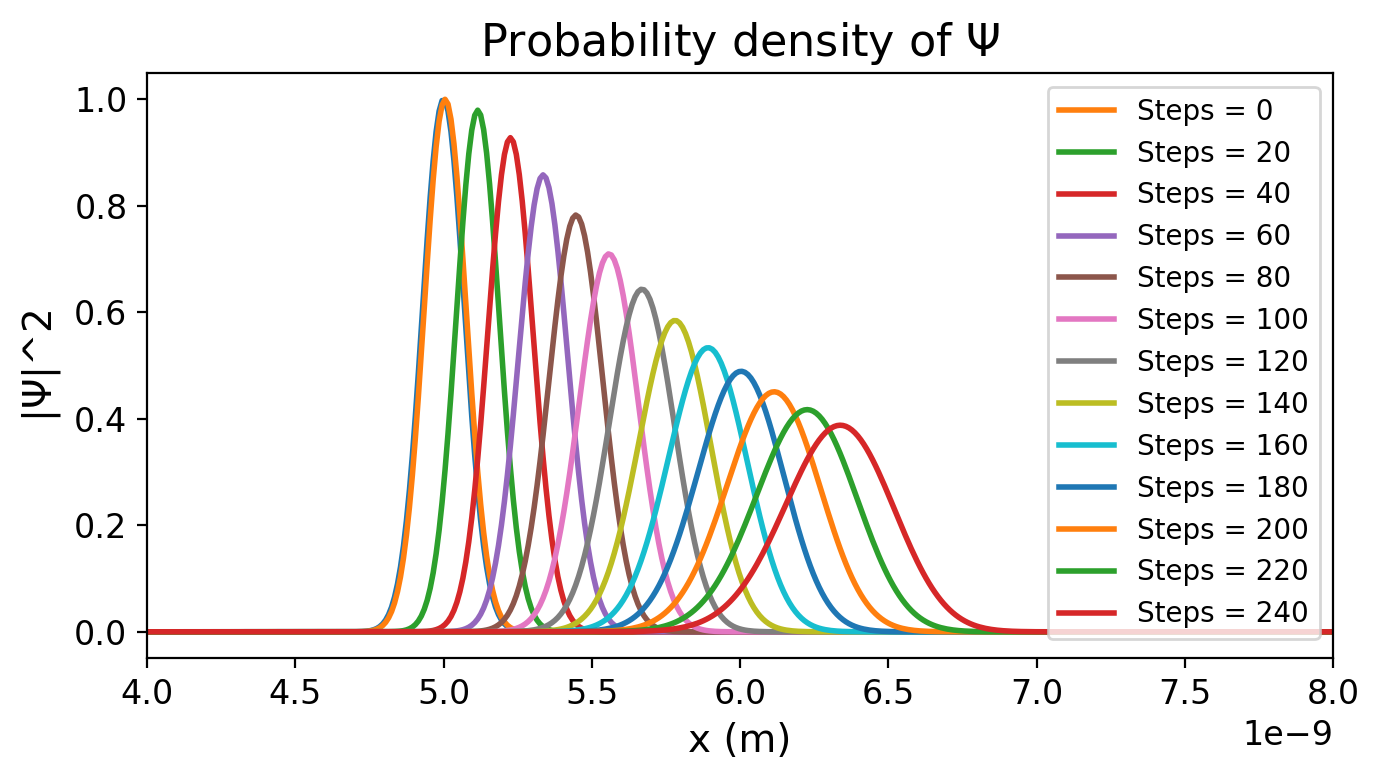

In [103]:
sigma = 1e-10       # m
k0 = 5e10           # wave number (1/m) 
L = 1e-8            # m
m_e = 9.109e-31     # kg
x0 = L / 2.0
N = 1000            # number of spatial grid points
dx = L / (N - 1)    # grid spacing
dt = 1e-18          # s
hbar = 1.0545e-34   # si units

# number of time steps to evolve (choose small for testing)
n_steps = 241


x = np.linspace(0.0, L, N)
phi0 = np.exp(-(x - x0)**2 / (2 * sigma**2)) * np.exp(1j * k0 * x)
# impose Dirichlet boundaries (phi(0)=phi(L)=0)
phi0[0] = 0.0 + 0.0j
phi0[-1] = 0.0 + 0.0j
phi = phi0.astype(complex)

coeff = 1j * dt * hbar / (4.0 * m_e * dx**2) 
main_A = 1.0 + 2.0 * coeff
off_A = -coeff
main_B = 1.0 - 2.0 * coeff
off_B = +coeff

A = np.zeros((N, N), dtype=complex)
B = np.zeros((N, N), dtype=complex)

for i in range(1, N-1):
    A[i, i] = main_A
    A[i, i-1] = off_A
    A[i, i+1] = off_A

    B[i, i] = main_B
    B[i, i-1] = off_B
    B[i, i+1] = off_B

# Boundary rows for Dirichlet phi=0: enforce phi[0]=phi[-1]=0 by identity rows
A[0, :] = 0.0
A[-1, :] = 0.0
A[0, 0] = 1.0
A[-1, -1] = 1.0

B[0, :] = 0.0
B[-1, :] = 0.0
B[0, 0] = 1.0
B[-1, -1] = 1.0


phi = phi.copy()
frames = [] 

plt.figure(figsize=(7,4))
plt.plot(x, np.abs(phi)**2)
plt.xlabel("x (m)")
plt.ylabel(r"|$\Psi$|^2")
plt.title(r"Probability density of $\Psi$")

for n in range(n_steps):
    v = B.dot(phi)
    # enforce boundary conditions
    v[0] = 0.0 + 0.0j
    v[-1] = 0.0 + 0.0j
    
    phi = np.linalg.solve(A, v)

    if n % 20 == 0:
        # store a snapshot for diagnostics/plotting
        frames.append(phi.copy())
        print(f"step {n:5d}, |phi|^2 max = {np.max(np.abs(phi)**2): .3e}")
        plt.plot(x, np.abs(phi)**2,label="Steps = {}".format(n))

plt.legend(loc='upper right')
plt.xlim(0.4e-8,0.8e-8)
plt.tight_layout()
plt.savefig("figs/probdensity.png", dpi=350, bbox_inches='tight')


In [105]:
#make gif
from matplotlib.animation import FuncAnimation, PillowWriter

x = np.linspace(0.0, L, N)
phi0 = np.exp(-(x - x0)**2 / (2 * sigma**2)) * np.exp(1j * k0 * x)
# impose Dirichlet boundaries (phi(0)=phi(L)=0)
phi0[0] = 0.0 + 0.0j
phi0[-1] = 0.0 + 0.0j
phi = phi0.astype(complex)
phi = phi.copy()
frames = [] 

n_steps = 500

for n in range(n_steps):
    v = B.dot(phi)
    # enforce boundary conditions
    v[0] = 0.0 + 0.0j
    v[-1] = 0.0 + 0.0j
    
    phi = np.linalg.solve(A, v)
    frames.append(phi.copy())

# Probability densities over time
prob_list = [np.abs(psi)**2 for psi in frames]

# Set up figure
fig, ax = plt.subplots(figsize=(8,4))
line, = ax.plot([], [], lw=2)

ax.set_xlim(x[0], x[-1])
ax.set_ylim(0, 1.1 * max(np.max(p) for p in prob_list))
ax.set_xlabel("x")
ax.set_ylabel(r"$|\psi(x,t)|^2$")
ax.set_title("Time Evolution of Probability Density")

# Initialization
def init():
    line.set_data([], [])
    return (line,)

# Frame update function
def update(frame):
    line.set_data(x, prob_list[frame])
    ax.set_title(f"Probability Density — Step {frame}")
    return (line,)

# Build animation
anim = FuncAnimation(
    fig,
    update,
    frames=len(prob_list),
    init_func=init,
    interval=80,      # milliseconds between frames
    blit=True
)

# Save GIF
writer = PillowWriter(fps=15)
anim.save("psi_evolution.gif", writer=writer)

plt.close(fig)
print("Saved psi_evolution.gif")


Saved psi_evolution.gif
